In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./maternal health data set 1/Maternal Health Risk Data Set 1.csv')
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [8]:
df.shape

(1014, 7)

In [3]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [6]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [11]:
sns.pairplot(df, hue='RiskLevel')

KeyboardInterrupt: 

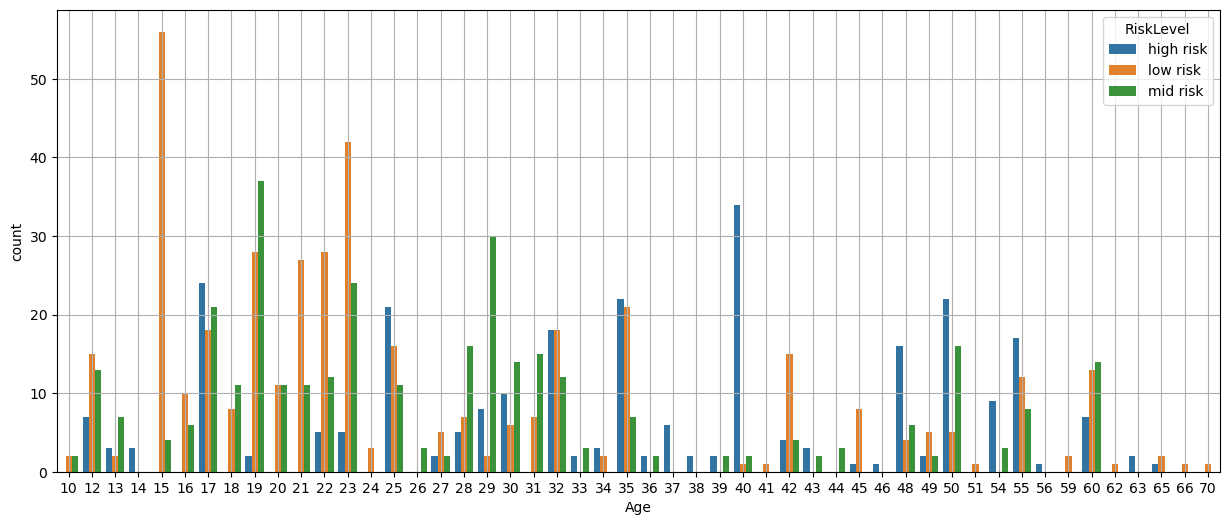

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',hue='RiskLevel', data=df)
plt.grid()

<Axes: ylabel='RiskLevel'>

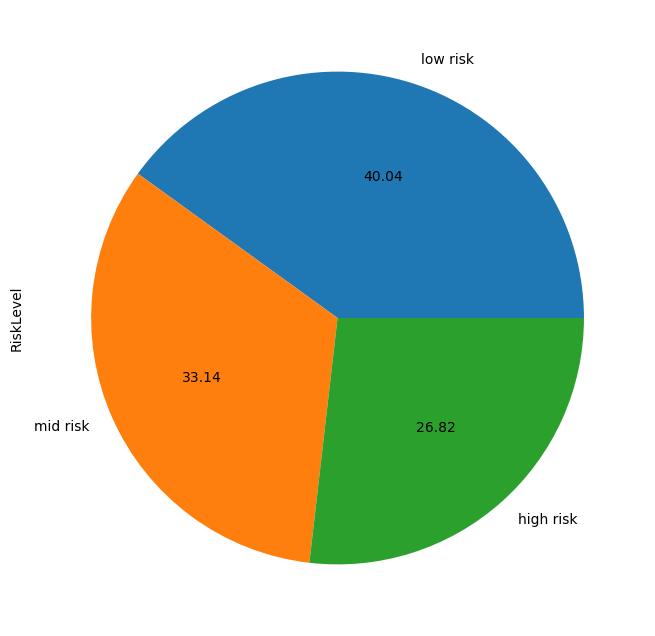

In [14]:
df['RiskLevel'].value_counts().plot.pie(autopct='%.2f', figsize=(8,8))

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

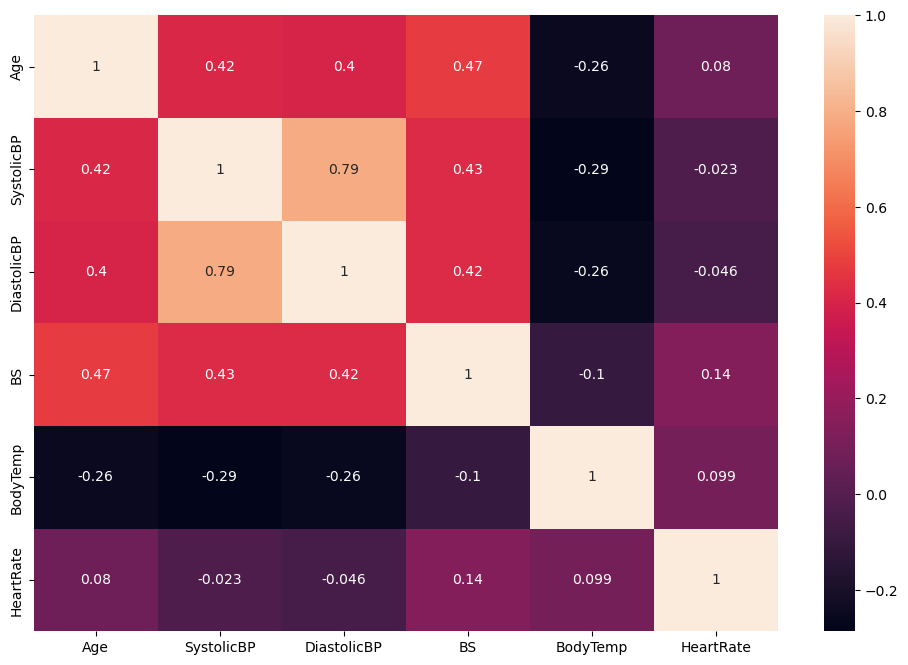

In [15]:
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [4]:
df['RiskLevel'] = df['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})

<Axes: xlabel='Age', ylabel='Count'>

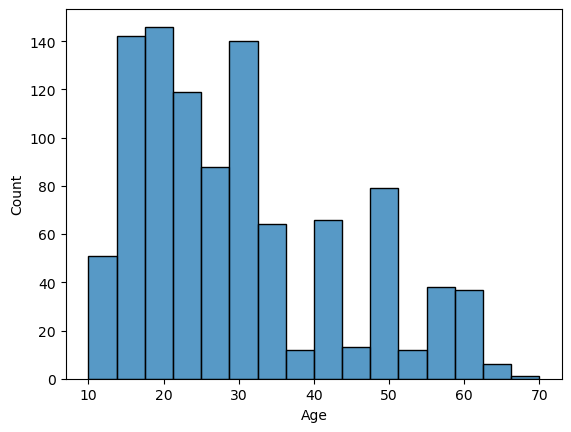

In [17]:
sns.histplot(df['Age'])

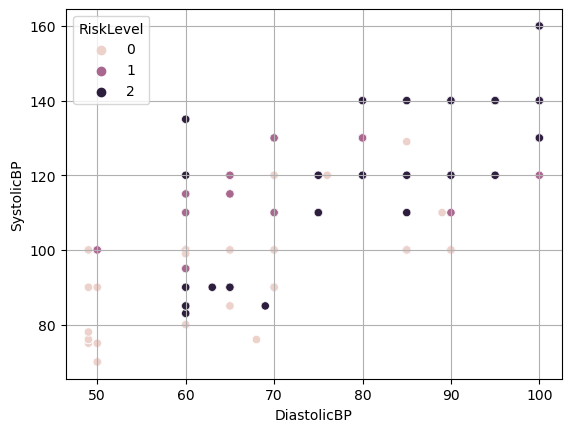

In [18]:
sns.scatterplot(x='DiastolicBP', y='SystolicBP', hue='RiskLevel', data=df)
plt.grid()

<Axes: xlabel='RiskLevel', ylabel='BS'>

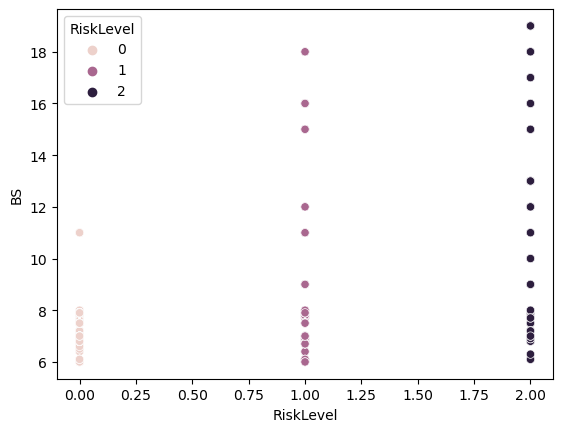

In [19]:
sns.scatterplot(x='RiskLevel', y='BS', hue='RiskLevel', data=df)

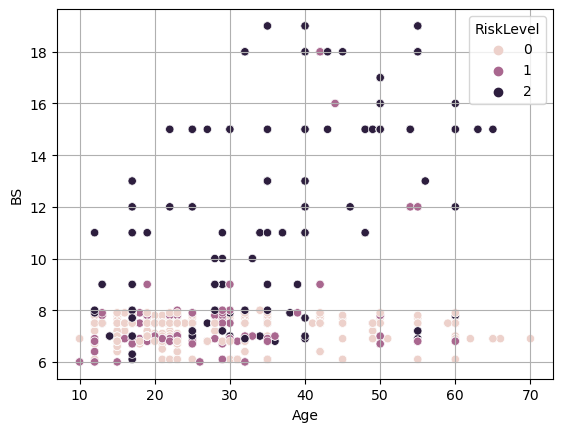

In [20]:
sns.scatterplot(x='Age', y='BS', hue='RiskLevel', data=df)
plt.grid()

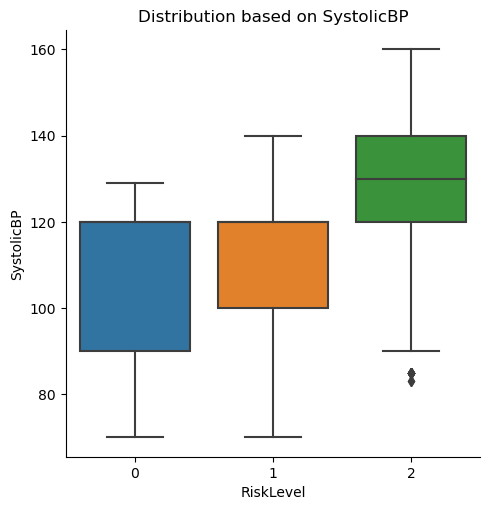

In [21]:
sns.catplot(x='RiskLevel', y='SystolicBP', data=df, kind='box').set(title='Distribution based on SystolicBP')

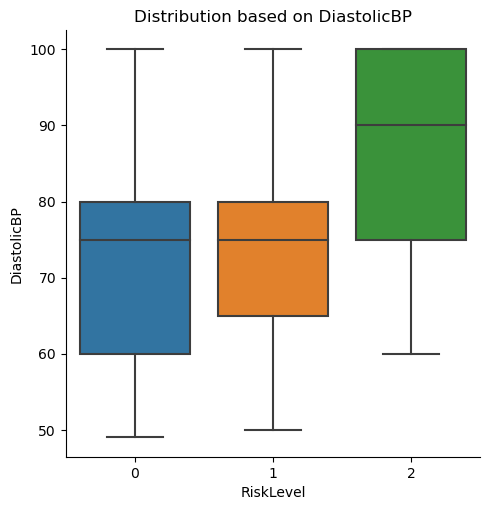

In [22]:
sns.catplot(x='RiskLevel', y='DiastolicBP', data=df, kind='box').set(title='Distribution based on DiastolicBP')

In [5]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']



In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [7]:
X_train.size

4560

In [8]:
X_test.size

1524

In [9]:
y_train.value_counts()

0    311
1    244
2    205
Name: RiskLevel, dtype: int64

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
pred = model.predict(X_test)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<Axes: >

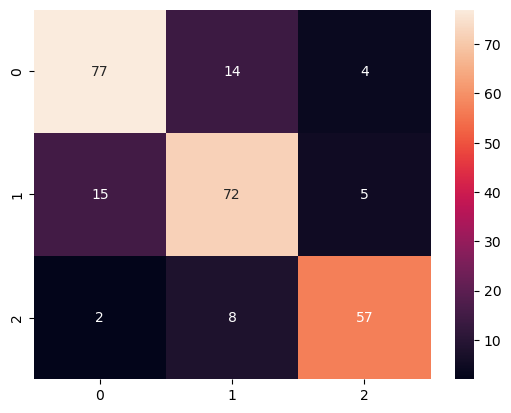

In [32]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [17]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.78      0.76      0.77        92
           2       0.81      0.85      0.83        67

    accuracy                           0.80       254
   macro avg       0.80      0.81      0.81       254
weighted avg       0.80      0.80      0.80       254



In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [19]:
X_train

array([[-0.60158195,  0.36677854,  0.25283285, -0.55181494,  3.07668957,
         0.19721219],
       [-0.97100848, -1.27615872, -0.83853197, -0.30466871,  3.07668957,
        -0.89239313],
       [-0.52769664,  1.46207005,  0.98040939, -0.58270822, -0.49582781,
        -0.52919136],
       ...,
       [-0.45381133,  0.36677854,  0.25283285, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.35892704, -0.72851297, -0.47474369, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.13727112,  1.46207005,  1.70798594, -0.55181494, -0.49582781,
         0.43934671]])

In [20]:
model5 = DecisionTreeClassifier(criterion='gini', random_state=20)
model5.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20)

In [21]:
y_pred = model5.predict(X_test)

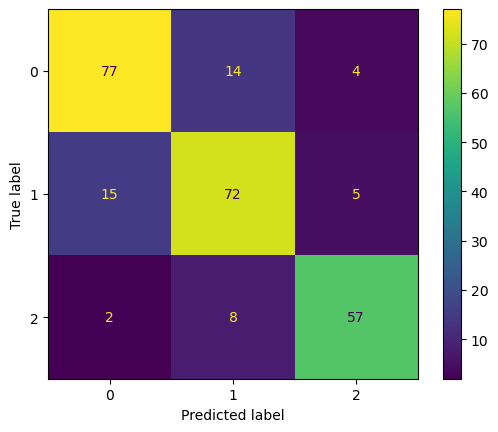

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model5.classes_)
disp.plot()



In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [24]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='gini')

RF.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
predict = RF.predict(X_test)

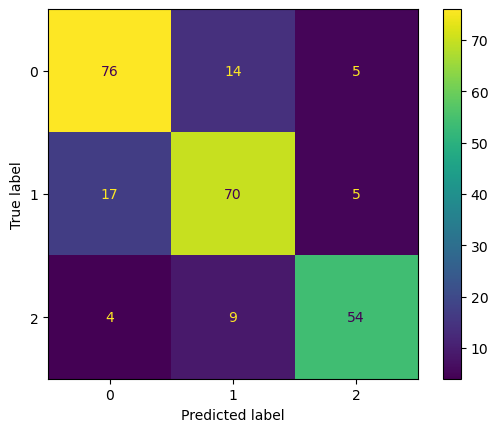

In [42]:
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()

In [26]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        95
           1       0.72      0.77      0.74        92
           2       0.86      0.81      0.83        67

    accuracy                           0.78       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.79      0.78      0.78       254



In [11]:
from sklearn.neighbors import KNeighborsClassifier


In [28]:
import math

In [29]:
math.sqrt(len(y_test))

15.937377450509228

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
knn_pred = knn.predict(X_test)

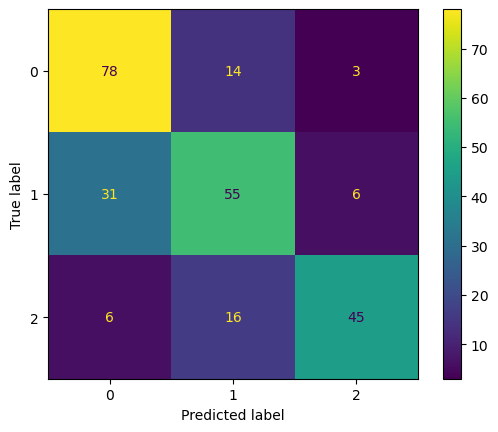

In [50]:
cn = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cn, display_labels=knn.classes_)
disp.plot()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [12]:
from xgboost import XGBClassifier

In [35]:
xgb = XGBClassifier()

In [36]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [37]:
xgb_pred = xgb.predict(X_test)

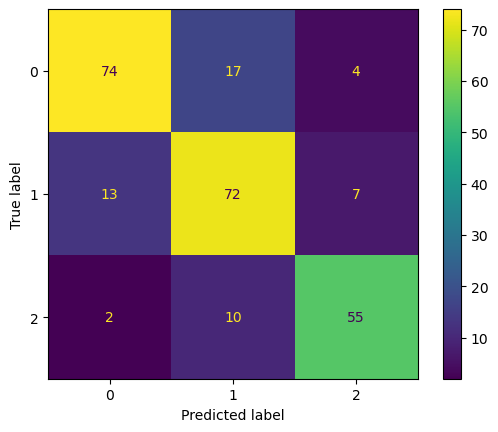

In [56]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp_xgb.plot()


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [39]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {
    "learning_rate": [0.5,1,3,5],
    "reg_lambda": [0, 1,5, 10,20]
}

In [60]:
grid = GridSearchCV(xgb, param_grid, cv = 3, scoring='roc_auc', n_jobs=-1)

In [61]:
grid.fit(X_train, y_train)

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1, 3, 5],
                         'reg_lambda': [0, 1, 5, 10, 20]},
             scoring='roc_auc')

In [62]:
grid.best_params_

{'learning_rate': 0.5, 'reg_lambda': 0}

In [63]:
grid.best_score_

nan

In [64]:
xgb = XGBClassifier(colsample_bytree= 0.5,gamma=0,learning_rate=0.1,max_depth=3,subsample=0.8,reg_lambda=0)

In [65]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [66]:
xgb_pred = xgb.predict(X_test)

Text(95.72222222222221, 0.5, 'Truth')

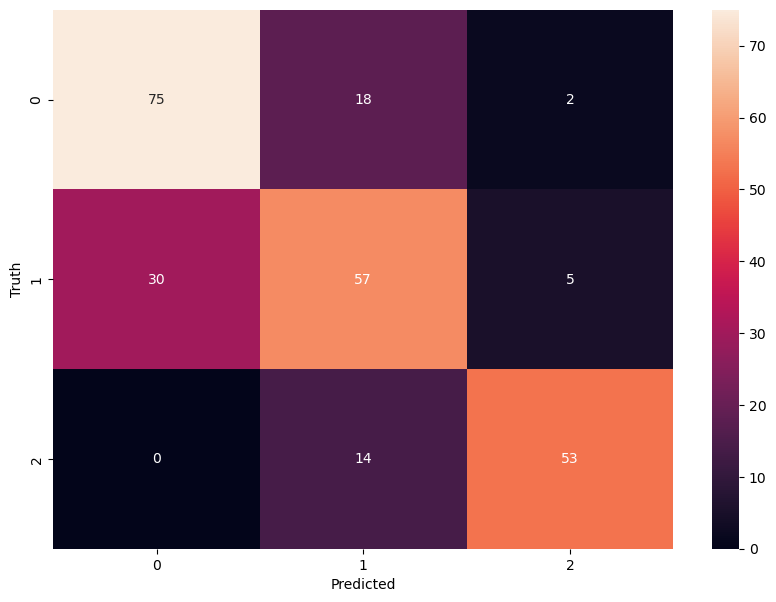

In [67]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [68]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        95
           1       0.64      0.62      0.63        92
           2       0.88      0.79      0.83        67

    accuracy                           0.73       254
   macro avg       0.75      0.73      0.74       254
weighted avg       0.73      0.73      0.73       254



In [69]:
param_grid={'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,15,20,30],
    'criterion' :['gini', 'entropy']
    
}

In [70]:
gridsearchcv=GridSearchCV(RF,param_grid,cv=5)

In [71]:
gridsearchcv.fit(X_train,y_train)


120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [72]:
gridsearchcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 500}

In [73]:
gridsearchcv.best_score_

0.8605263157894736

In [76]:
RF2= RandomForestClassifier(criterion='entropy',max_depth=20,max_features='log2',n_estimators=500)

In [77]:
RF2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=500)

In [78]:
rf_pred=RF2.predict(X_test)

In [79]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        95
           1       0.76      0.78      0.77        92
           2       0.86      0.81      0.83        67

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



Text(95.72222222222221, 0.5, 'Truth')

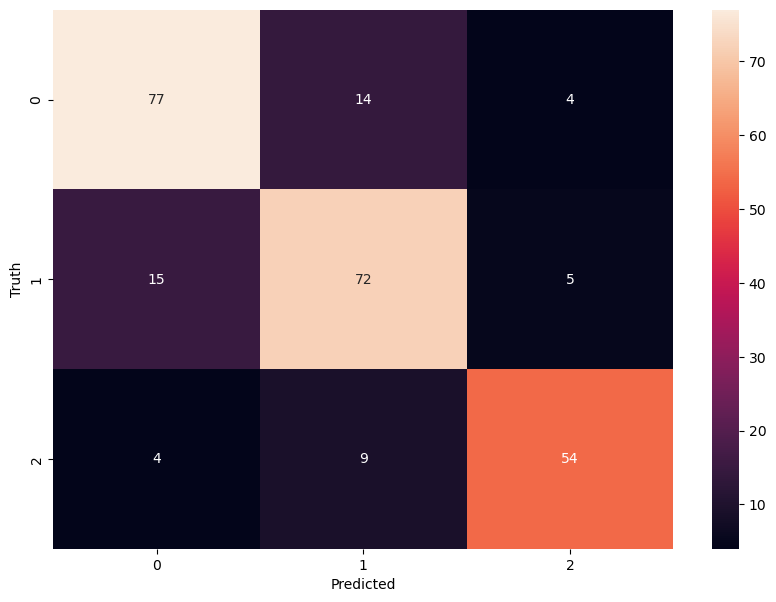

In [80]:
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [81]:
from sklearn.svm import SVC

In [82]:
svc = SVC(kernel='poly')

In [83]:
svc.fit(X_train, y_train)

SVC(kernel='poly')

In [84]:
svc_pred = svc.predict(X_test)

In [86]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.51      0.92      0.66        95
           1       0.42      0.15      0.22        92
           2       0.77      0.60      0.67        67

    accuracy                           0.56       254
   macro avg       0.57      0.55      0.52       254
weighted avg       0.55      0.56      0.50       254



Decision Tree Classifier:
[[77 14  4]
 [15 70  7]
 [ 2  8 57]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.76      0.76      0.76        92
           2       0.84      0.85      0.84        67

    accuracy                           0.80       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.80      0.80      0.80       254

Random Forest Classifier:
[[78 13  4]
 [15 72  5]
 [ 3 10 54]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        95
           1       0.76      0.78      0.77        92
           2       0.86      0.81      0.83        67

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.81       254
weighted avg       0.80      0.80      0.80       254

K-Nearest Neighbors Classifier:
[[78 14  3]
 [31 55  6]
 [ 6 16 45]]
              precision    recall  f1-score

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


Grid Search Results for XGBoost Classifier:
Best Parameters: {'learning_rate': 0.5, 'reg_lambda': 0}
Best Score: nan
Support Vector Classifier:
[[87  5  3]
 [69 14  9]
 [13 14 40]]
              precision    recall  f1-score   support

           0       0.51      0.92      0.66        95
           1       0.42      0.15      0.22        92
           2       0.77      0.60      0.67        67

    accuracy                           0.56       254
   macro avg       0.57      0.55      0.52       254
weighted avg       0.55      0.56      0.50       254



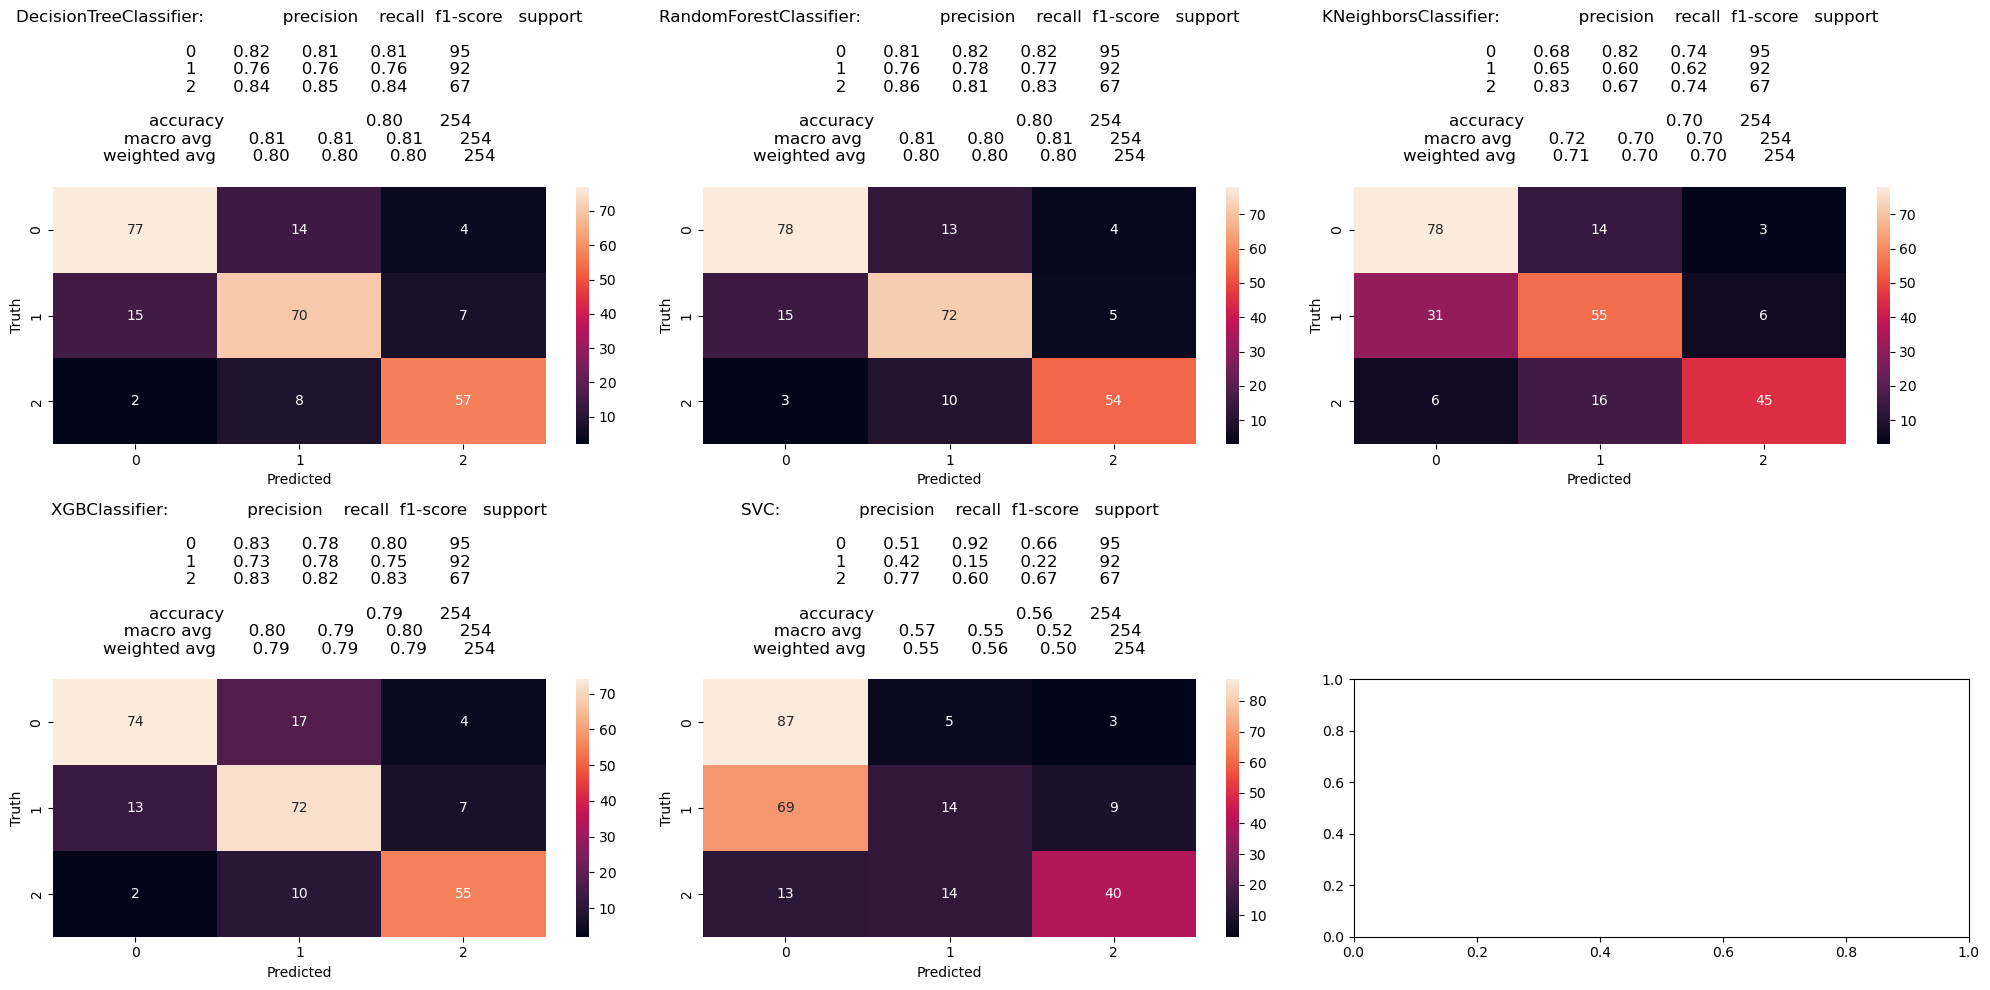

AttributeError: predict_proba is not available when  probability=False

In [15]:
import lime
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load and preprocess the data
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Decision Tree Classifier:")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Train a Random Forest Classifier
RF = RandomForestClassifier(criterion='gini')
RF.fit(X_train, y_train)
predict = RF.predict(X_test)
print("Random Forest Classifier:")
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

# Train a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors Classifier:")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Train an XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost Classifier:")
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# Perform Grid Search for XGBoost Classifier
param_grid = {
    "learning_rate": [0.5, 1, 3, 5],
    "reg_lambda": [0, 1, 5, 10, 20]
}
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)
print("Grid Search Results for XGBoost Classifier:")
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Train a Support Vector Classifier
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("Support Vector Classifier:")
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))



feature_names = df.columns.tolist()
class_names = y.unique().tolist()


# plot the classification report of each models in same graph
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()
for i, model in enumerate([model, RF, knn, xgb, svc]):
    pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax=axes[i], fmt='g')
    axes[i].set_title(f"{model.__class__.__name__}: {classification_report(y_test, pred)}")
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Truth')
plt.tight_layout()
plt.show()



# LIME explanation
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=class_names)
explanation = explainer.explain_instance(X_test[0], model.predict_proba)
explanation.show_in_notebook()

(254, 6, 3)


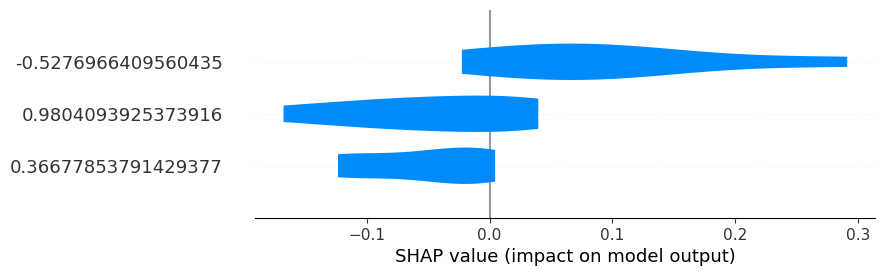

In [114]:
# SHAP explanation
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
print(shap_values.shape)
# shap.plots.waterfall(shap_values[0, 1])


shap.plots.violin(shap_values[0])







In [ ]:
"""
The data set used in this file is the "Maternal Health Risk Data Set 1". 
It contains information about various risk factors related to maternal health.
The dataset includes features such as age, blood pressure, and blood sugar levels, as well as the corresponding risk level (low risk, mid risk, high risk).
The goal of this analysis is to build machine learning models to predict the risk level based on the given features.
"""





In [42]:
X_test[0]

array([-0.52769664,  0.36677854,  0.98040939, -0.36645527, -0.49582781,
       -0.52919136])

In [48]:
# create a function to give the prediction with the given features and model

def prediction(features, model):
    features = np.array(features).reshape(1, -1)
    features = scale.transform(features)
    pred = model.predict(features)
    if pred == 0:
        print("Low Risk")  
    elif pred == 1:
        print("Mid Risk")
    else:
        print("High Risk")
        
# check the prediction function with the first row of the test set
prediction(X_test[5], model)

Low Risk


X does not have valid feature names, but StandardScaler was fitted with feature names


In [ ]:
# how many models are used in this notebook ?
# 6
# list down all the models ?
# Decision Tree Classifier, Random Forest Classifier, K-Nearest Neighbors Classifier, XGBoost Classifier, Support Vector Classifier

# write a result report on all these models ?

# which model has the best accuracy ?
# XGBoost Classifier
# what is the accuracy of XGBoost Classifier ?
# 0.75

# which model has the worst accuracy ?
# K-Nearest Neighbors Classifier

# what is the accuracy of that model ?
# 0.5

# which model has the best precision ?
# XGBoost Classifier

# what is the precision of that model ?
# 0.75
